## Summary Mauna Loa volcano
This notebook does multiple calls of `plot_data.py` to visualize the displacement history. For options see `plot_data.py --help`. Modify the `cmd` line to test plot options.

In [1]:
import os
import sys
import urllib
import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import LinearSegmentedColormap
from mintpy.utils import readfile, writefile, utils as ut
from mintpy.defaults.plot import *
from mintpy.objects.gps import search_gps, GPS
from mintpy.objects import sensor
from mintpy.view import prep_slice, plot_slice
from mintpy.cli import view, timeseries2velocity, reference_point, asc_desc2horz_vert, save_gdal, mask
import plot_data
%load_ext jupyter_ai
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


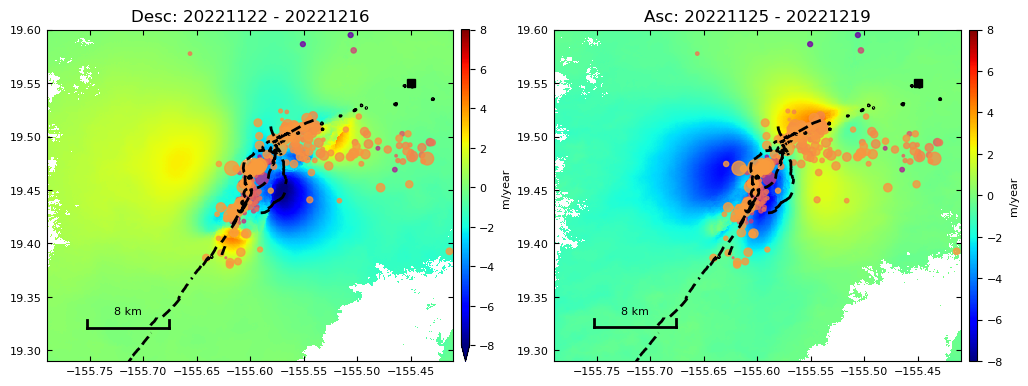

(None, None, None)

In [2]:
%%capture --no-display
######################################################
##########   TEST  COERUPTIVE   ###################### 
######################################################

cmd = 'plot_data.py MaunaLoaSenDT87/mintpy_5_20 MaunaLoaSenAT124/mintpy_5_20 --period 20221127-20221219 --plot-type velocity --mask-thresh 0.90 --ref-point 19.55,-155.45 --unit m --vlim -8 8 --seismicity' 
plot_data.main(cmd.split()[1:])

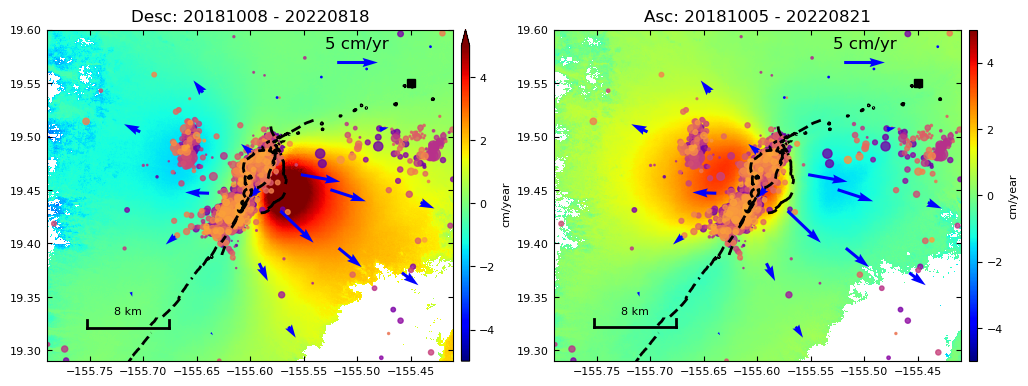

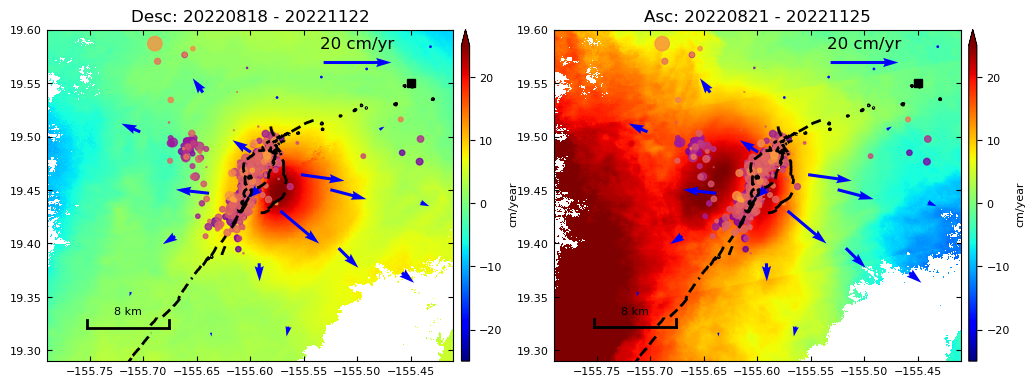

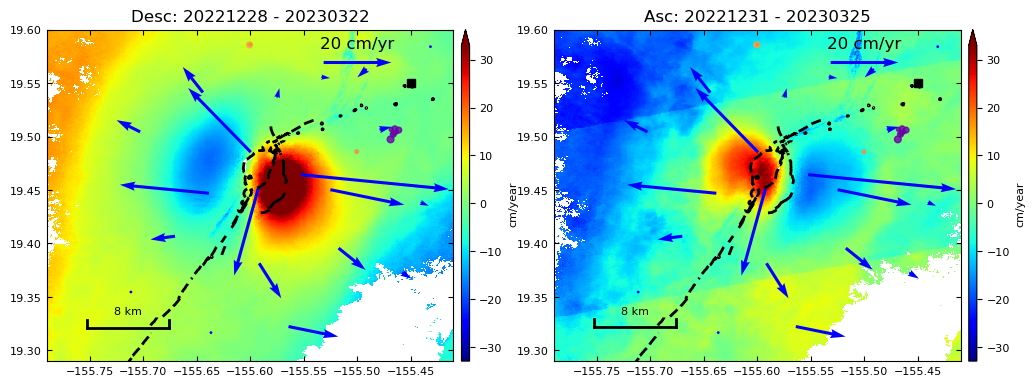

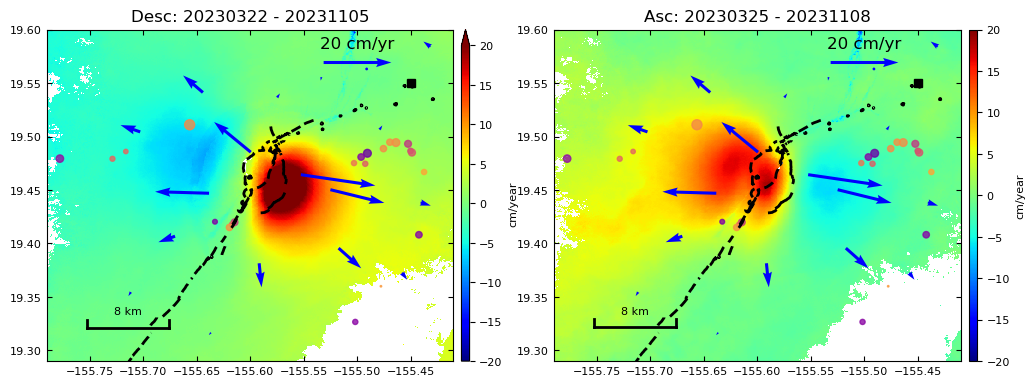

In [3]:
%%capture --no-display
######################################################
################     FINAL      ###################### 
### Two pre-eruption and two post-eruption periods ###
######################################################
add_opt = ''
common_opt='MaunaLoaSenDT87/mintpy_5_20 MaunaLoaSenAT124/mintpy_5_20 --plot-type velocity --mask-thresh 0.90 --ref-point 19.55,-155.45'
add_opt = '--GPS --seismicity --save-gbis'
cmd_list = [  
                 '--period 20181012-20220821 --vlim -5 5   --GPS-scale-fac 500  --GPS-key-length 5  --GPS-units cm/yr',
                 '--period 20220821-20221127 --vlim -25 25 --GPS-scale-fac 1200 --GPS-key-length 20 --GPS-units cm/yr',
            #    '--period 20221127-20221219 --vlim -8 8 --unit m',
                 '--period 20221231-20230328 --vlim -33 33 --GPS-scale-fac 1200 --GPS-key-length 20 --GPS-units cm/yr',
                 '--period 20230328-20231110 --vlim -20 20 --GPS-scale-fac 1200 --GPS-key-length 20 --GPS-units cm/yr'          
        ] 

for tok in cmd_list:
    cmd=['plot_data.py ' + common_opt + ' ' + tok + ' ' + add_opt][0]
    print(cmd)
    print(cmd.split()[1:])
    plot_data.main(cmd.split()[1:])

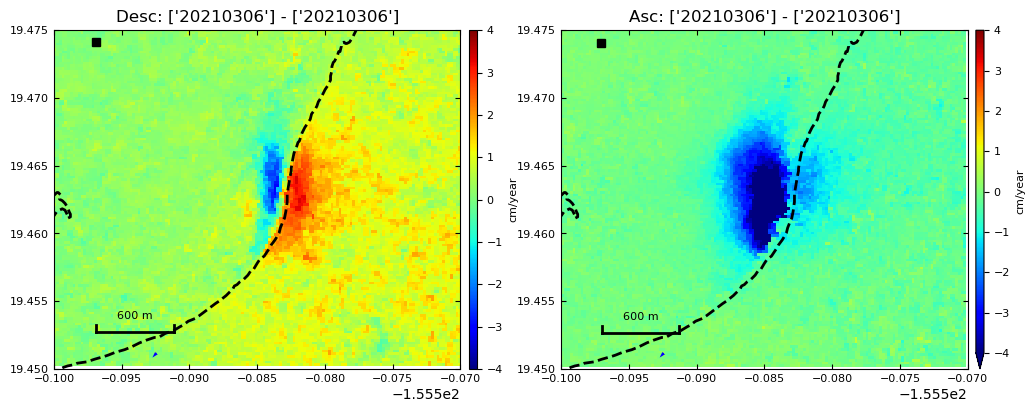

In [4]:
%%capture --no-display
######################################################
###      2021 precursory earthquake                ###
######################################################
add_opt = ''
common_opt='MaunaLoaSenDT87/mintpy_2_8_step MaunaLoaSenAT124/mintpy_2_8_step --plot-type step --mask-thresh 0.90 --ref-point 19.474,-155.597 --plot-box 19.45:19.475,-155.60:-155.57 --vlim -4 4'
add_opt = '--GPS --save-gbis'
cmd_list = [  
            '--plot-type step --period 20201001-20210306  --vlim -4 4'
            ] 

for tok in cmd_list:
    cmd=['plot_data.py ' + common_opt + ' ' + tok + ' ' + add_opt][0]
    print(cmd)
    print(cmd.split()[1:])
    plot_data.main(cmd.split()[1:])


In [5]:
# %%capture --no-display
# ##################################
# ### Three pre-eruption periods ###
# ###### DON'T USE #################
# ##################################
# add_opt = ''
# common_opt='MaunaLoaSenDT87/mintpy_5_20  --plot-type shaded-relief --GPS'
# cmd_list = [  
#                  '--period 20181012-20220901 --GPS-scale-fac 500  --GPS-key-length 5  --GPS-units cm/yr'   ,
#                  '--period 20220901-20221015 --GPS-scale-fac 1000 --GPS-key-length 10 --GPS-units cm/yr'   ,
#                  '--period 20221015-20221127 --GPS-scale-fac 1000 --GPS-key-length 10 --GPS-units cm/yr'   
#    ] 
    # for tok in cmd_list:
#     cmd=['plot_data.py ' + common_opt + ' ' + tok + ' ' + add_opt][0]
#     print(cmd)
#     print(cmd.split()[1:])
#     plot_data.main(cmd.split()[1:])

In [6]:
# %%capture --no-display
# ##################################
# ### Time series (8 periods) ###
# ###### DON'T USE #################
# ##################################
# cmd_list = [  
#                  '--period 20181012-20220901 --GPS-scale-fac 500  --GPS-key-length 5  --GPS-units cm/yr',  
#                  '--period 20220901-20221126 --GPS-scale-fac 1200 --GPS-key-length 20 --GPS-units cm/yr',
#                  '--period 20221126-20221129 --GPS-scale-fac 3000 --GPS-key-length 50 --GPS-units cm',
#             ##   '--period 20221129-20221212 --GPS-scale-fac 1000 --GPS-key-length 20 --GPS-units cm',
#             ##   '--period 20221212-20221231 --GPS-scale-fac 2000 --GPS-key-length 20 --GPS-units cm/yr',
#                  '--period 20221129-20221231 --GPS-scale-fac 1000 --GPS-key-length 20 --GPS-units cm',
#                  '--period 20221231-20230331 --GPS-scale-fac 1200 --GPS-key-length 20 --GPS-units cm/yr',
#                  '--period 20230331-20230620 --GPS-scale-fac 1200 --GPS-key-length 20 --GPS-units cm/yr'      
#         ]   
# # cmd = 'plot_data.py MaunaLoaSenDT87/mintpy_5_20  --plot-type shaded-relief --GPS'
# for tok in cmd_list:
#     cmd=['plot_data.py ' + common_opt + ' ' + tok + ' ' + add_opt][0]
#     print(cmd)
#     print(cmd.split()[1:])
#     plot_data.main(cmd.split()[1:])

In [7]:
!plot_data.py --help

Command: ['/Users/famelung/code/rsmas_insar/tools/plotdata/plot_data.py', '--help']
iargs ['--help']
In cmd_line_parse: iargs: ['--help']
usage: plot_data.py [-h] [--plot-box PLOT_BOX] [--period PERIOD]
                    [--seismicity] [--GPS] [--plot-type PLOT_TYPE]
                    [--lines LINE_FILE] [--GPS-scale-fac GPS_SCALE_FAC]
                    [--GPS-key-length GPS_KEY_LENGTH] [--GPS-units GPS_UNIT]
                    [--unit UNIT] [--fontsize FONT_SIZE]
                    [--ref-point REFERENCE_LALO] [--mask-thresh MASK_VMIN]
                    [--vlim VMIN VMAX] [--save-gbis]
                    [data_dir ...]

Plotting of InSAR, GPS and Seismicity data

positional arguments:
  data_dir              Directory(s) with InSAR data.

options:
  -h, --help            show this help message and exit
  --plot-box PLOT_BOX, --subset-lalo PLOT_BOX
                        geographic area plotted
  --period PERIOD       time period (20220101-20221101)
  --seismicity          